<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Libraries-and-load-the-data:" data-toc-modified-id="Importing-Libraries-and-load-the-data:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Libraries and load the data:</a></span></li><li><span><a href="#Cross-Validation:" data-toc-modified-id="Cross-Validation:-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Cross Validation:</a></span><ul class="toc-item"><li><span><a href="#Preparation" data-toc-modified-id="Preparation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Preparation</a></span></li><li><span><a href="#Train-Test-split:" data-toc-modified-id="Train-Test-split:-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Train Test split:</a></span></li></ul></li><li><span><a href="#Model-Training-and-Evaluation" data-toc-modified-id="Model-Training-and-Evaluation-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model Training and Evaluation</a></span><ul class="toc-item"><li><span><a href="#Random-Forest:" data-toc-modified-id="Random-Forest:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Random Forest:</a></span></li><li><span><a href="#KNN:" data-toc-modified-id="KNN:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>KNN:</a></span></li><li><span><a href="#Linear-Regression-with-ridge-regularization:" data-toc-modified-id="Linear-Regression-with-ridge-regularization:-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear Regression with ridge regularization:</a></span></li><li><span><a href="#Lasso-regression:" data-toc-modified-id="Lasso-regression:-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Lasso regression:</a></span></li><li><span><a href="#SVM:" data-toc-modified-id="SVM:-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>SVM:</a></span></li></ul></li><li><span><a href="#Making-a-final-predictions" data-toc-modified-id="Making-a-final-predictions-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Making a final predictions</a></span></li></ul></div>

# Build Model

## Importing Libraries and load the data:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.kernel_ridge import KernelRidge
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
#import lightgbm as lgb

In [3]:
# getting data from feature engineering notebook
%store -r train_set_1
%store -r test_set_1
%store -r ytrain_1

test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")


train_set = train_set_1
test_set = test_set_1

In [4]:
train_set.head()

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Street_Grvl,Street_Pave
0,6.752270,4.094345,4.174387,1.945910,1.609438,7.602401,7.602401,5.278115,7.444249,0.0,...,0,0,1,0,0,0,0,0,0,1
1,7.140453,2.995732,4.382027,1.791759,2.079442,7.588830,7.588830,0.000000,7.140453,0.0,...,0,0,1,0,0,0,0,0,0,1
2,6.824374,4.094345,4.219508,1.945910,1.609438,7.601402,7.601902,5.087596,7.487734,0.0,...,0,0,1,0,0,0,0,0,0,1
3,6.628041,4.248495,4.094345,1.945910,1.609438,7.557473,7.585789,0.000000,7.448334,0.0,...,0,0,1,0,0,0,0,0,0,1
4,7.043160,4.094345,4.430817,2.079442,1.609438,7.600902,7.600902,5.857933,7.695303,0.0,...,0,0,1,0,0,0,0,0,0,1


In [5]:
print ("Train data shape:", train_set.shape)

('Train data shape:', (1426, 236))


In [6]:
test_set.head()

,TotalBsmtSF,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,GrLivArea,BsmtFullBath,...,Condition2_Artery,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Street_Grvl,Street_Pave
1426,6.782192,2.995732,4.382027,1.609438,1.791759,7.581210,7.581210,0.000000,6.797940,0.0,...,0,0,1,0,0,0,0,0,0,1
1427,7.192182,2.995732,4.394449,1.791759,1.791759,7.579679,7.579679,4.682131,7.192182,0.0,...,0,0,1,0,0,0,0,0,0,1
1428,6.833032,4.094345,4.304065,1.609438,1.609438,7.599401,7.599902,0.000000,7.395722,0.0,...,0,0,1,0,0,0,0,0,0,1
1429,6.830874,4.094345,4.356709,1.791759,1.791759,7.599902,7.599902,2.995732,7.380256,0.0,...,0,0,1,0,0,0,0,0,0,1
1430,7.154615,4.787492,3.761200,2.079442,1.609438,7.596894,7.596894,0.000000,7.154615,0.0,...,0,0,1,0,0,0,0,0,0,1


In [7]:
print ("Test data shape:", test_set.shape)

('Test data shape:', (1459, 236))


## Cross Validation:

### Preparation

In [8]:
# we keep the test id to make submission after
test_ID = test["Id"]

In [9]:
# we apply log to the target value
X = train_set
y = np.log(ytrain_1)
y

array([12.24769432, 12.10901093, 12.31716669, ..., 12.49312952,
       11.86446223, 11.90158345])

### Train Test split:

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#with pca
#X_train1, X_test1, y_train1, y_test1 = train_test_split(x_fit, y, test_size=0.33, random_state=42)

y_train = y_train.ravel()
y_test = y_test.ravel()

from sklearn.cross_validation import KFold, cross_val_score, cross_val_predict
k_fold = KFold(len(y), n_folds=10, shuffle=True, random_state=0)

## Model Training and Evaluation

Since our data is ready, we'll start training models now. We'll use five algorithms: Random Forest, KNN, Linear Regression with ridge regularization, Lasso Regression and SVM. Finally, we'll generate final predictions with highest-score algorithm. 

### Random Forest:

In [11]:
from sklearn.ensemble import RandomForestRegressor

# Fit Random Forest on Training Set
regressor = RandomForestRegressor(n_estimators=300, random_state=0)
model_random_forest = regressor.fit(X_train, y_train)


# Score model
cross_valid_scores = cross_val_score(model_random_forest, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", model_random_forest.score(X_test, y_test)) 

print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(model_random_forest, X_test, y_test, cv=5 )

('Test score is: \n', 0.8744246229653432)
('Cross validation test scores are: \n', array([0.8838716 , 0.83642024, 0.80282994, 0.85683789, 0.82656002]))
('Cross validation test scores mean is: \n', 0.841303938851846)


In [12]:
predictions_rf = model_random_forest.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_1)))

Mean squared Error : 0.01775943198243962


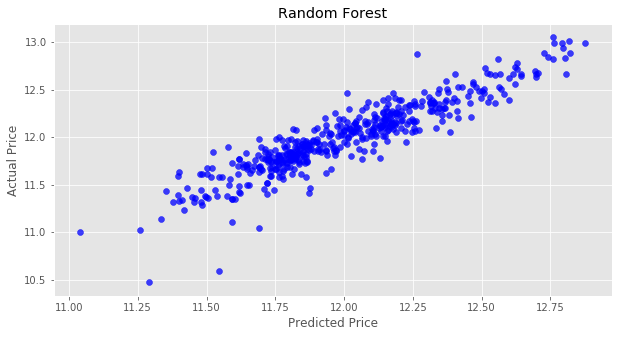

In [13]:
actual_values = y_test
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Random Forest')
plt.show()

### KNN:

In [14]:
k=5
knn = neighbors.KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=k, p=2,
          weights='uniform')

knn.fit(X_train, y_train)

cross_valid_scores = cross_val_score(knn, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", knn.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
predict = cross_val_predict(knn, X_test, y_test, cv=5 )

('Test score is: \n', 0.6822975064604109)
('Cross validation test scores are: \n', array([0.62594162, 0.54387073, 0.56985747, 0.62759697, 0.65807062]))


In [15]:
predictions_knn = knn.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_2)))

Mean squared Error : 0.04493090889235897


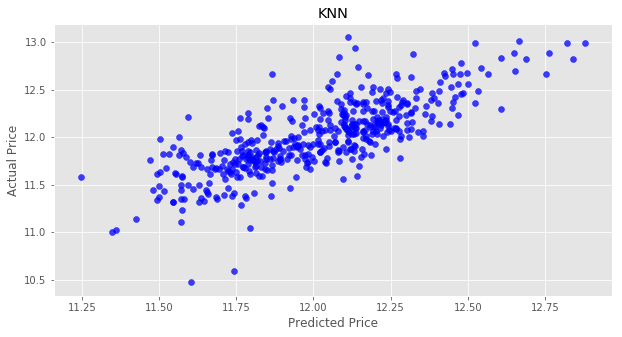

In [16]:
actual_values = y_test
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('KNN')
plt.show()

### Linear Regression with ridge regularization:

In [17]:
from sklearn.metrics import mean_squared_error

linm = linear_model.Ridge(alpha = 10)

linm.fit(X_train, y_train)

# Score model
cross_valid_scores = cross_val_score(linm, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", linm.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(linm, X_test, y_test, cv=5 )

('Test score is: \n', 0.8856587766670769)
('Cross validation test scores are: \n', array([0.88666914, 0.83345232, 0.84935232, 0.85712497, 0.85213006]))
('Cross validation test scores mean is: \n', 0.855745763013536)


In [18]:
predictions_ridge = linm.predict(X_test)
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions)))

Mean Squared Error : 0.016170647674102232


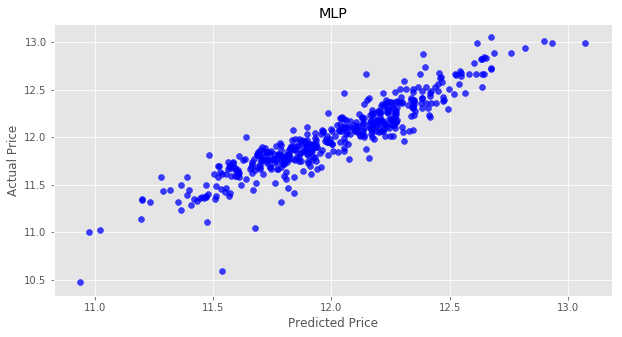

In [19]:
actual_values = y_test
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('MLP')
plt.show()

###  Lasso regression:

In [20]:
# Lasso regression
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
lasso.fit(X_train, y_train)
# Score model
cross_valid_scores = cross_val_score(lasso, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", lasso.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(lasso, X_test, y_test, cv=5 )

('Test score is: \n', 0.8962304270841027)
('Cross validation test scores are: \n', array([0.91025594, 0.85408244, 0.87874299, 0.85550286, 0.87775457]))
('Cross validation test scores mean is: \n', 0.8752677594168651)


In [21]:
predictions_lasso = lasso.predict(X_test)
print("Mean squared Error : " + str(mean_squared_error(y_test,predictions_lasso)))

Mean squared Error : 0.014675557546110956


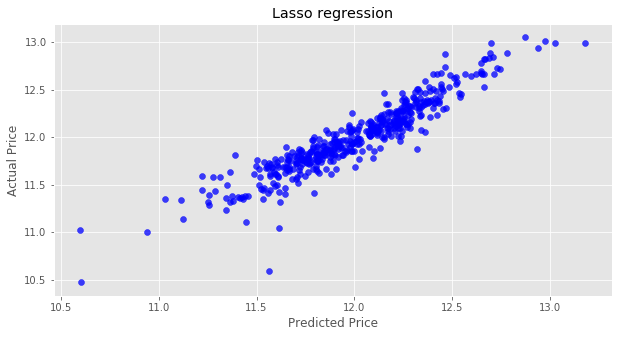

In [22]:
actual_values = y_test
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('Lasso regression')
plt.show()

###  SVM:

In [23]:
from sklearn.svm import SVR

# SVM
svr_model = SVR(kernel='rbf', C=2, epsilon=0.05)
svr_model.fit(X, y)

# Score model
cross_valid_scores = cross_val_score(svr_model, X_test, y_test,cv=5, n_jobs=1)

print ("Test score is: \n", svr_model.score(X_test, y_test)) 
print("Cross validation test scores are: \n", cross_valid_scores) #return a np.array of each test trill
print("Cross validation test scores mean is: \n", cross_valid_scores.mean()) # mean of all cross validations tests
predict = cross_val_predict(svr_model, X_test, y_test, cv=5 )

('Test score is: \n', 0.9269661045255424)
('Cross validation test scores are: \n', array([0.88038371, 0.8318581 , 0.85384354, 0.86349901, 0.85161772]))
('Cross validation test scores mean is: \n', 0.8562404159987373)


In [24]:
predictions_SVM = svr_model.predict(X_test)
print("Mean Squared Error : " + str(mean_squared_error(y_test,predictions_8)))

Mean Squared Error : 0.010328780448202603


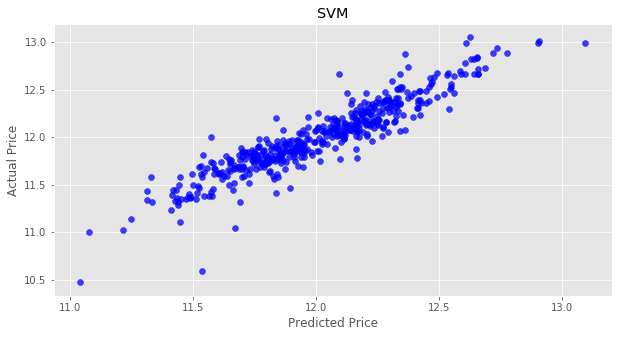

In [25]:
actual_values = y_test
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
plt.scatter(predict, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted Price')
plt.ylabel('Actual Price')
plt.title('SVM')
plt.show()

We get MSE as 0.01032, which is our best score so far. We make final predictions with this model.

## Making a final predictions

In [26]:
submission = pd.DataFrame()
%store -r test_ID
submission['Id'] = test_ID

no stored variable test_ID


In [27]:
feats = test_set.select_dtypes(
        include=[np.number]).interpolate()
feats.shape

(1459, 236)

In [28]:
predictions = svr_model.predict(feats)
final_predictions = np.exp(predictions)
#final_predictions = predictions

In [29]:
submission['SalePrice'] = final_predictions
submission.head(10)

,Id,SalePrice
0,1461,116902.536618
1,1462,157042.494324
2,1463,171778.629975
3,1464,185907.164485
4,1465,217652.839655
5,1466,173544.590968
6,1467,172162.060559
7,1468,169853.790712
8,1469,170783.857945
9,1470,118612.595363


In [ ]:
#submission.to_csv("name_submission.csv", index=False)